# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
anime.info()
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [3]:
# Check for missing data in the anime dataset
print(anime.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [4]:
# Check for missing data in the rating dataset
print(rating.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


In [5]:
# For the 'genre' column, filling missing values with a default value, such as 'Unknown'
anime['genre'].fillna('Unknown', inplace=True)

In [6]:
# For the 'type' column, filling missing values with a default value, such as 'Unknown'
anime['type'].fillna('Unknown', inplace=True)

In [7]:
# Since the proportion of missing values is relatively low, 
# removing the rows with null values in the rating column should not significantly impact my analysis.
# In this case, it might be acceptable to drop rows with missing ratings, 
# as it can help you avoid introducing bias by imputing values.
anime.dropna(subset=['rating'], inplace=True)

In [8]:
print(anime.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [9]:
# Finding outliers:

# Calculate the 1st quartile (Q1) and 3rd quartile (Q3) for the 'rating' column
Q1_rating = anime['rating'].quantile(0.25)
Q3_rating = anime['rating'].quantile(0.75)

# Calculate the IQR for the 'rating' column
IQR_rating = Q3_rating - Q1_rating

# Define the upper and lower bounds for outliers in the 'rating' column
lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

# Calculate the 1st quartile (Q1) and 3rd quartile (Q3) for the 'members' column
Q1_members = anime['members'].quantile(0.25)
Q3_members = anime['members'].quantile(0.75)

# Calculate the IQR for the 'members' column
IQR_members = Q3_members - Q1_members

# Define the upper and lower bounds for outliers in the 'members' column
lower_bound_members = Q1_members - 1.5 * IQR_members
upper_bound_members = Q3_members + 1.5 * IQR_members

# Find the outliers in the 'rating' and 'members' columns
outliers_rating = anime[(anime['rating'] < lower_bound_rating) | (anime['rating'] > upper_bound_rating)]
outliers_members = anime[(anime['members'] < lower_bound_members) | (anime['members'] > upper_bound_members)]

# Print the outliers
print("Outliers in the 'rating' column:")
print(outliers_rating)
print("Outliers in the 'members' column:")
print(outliers_members)

Outliers in the 'rating' column:
       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12263     17825                Ikenai Boy: Ikasu Maruhi Hand Power   
12268     23677                               Manga Edo Erobanashi   
12270     29994                          Misato-chan no Yume Nikki   
12275     29111  Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho   
12278     17833                                    Pink no Curtain   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supern

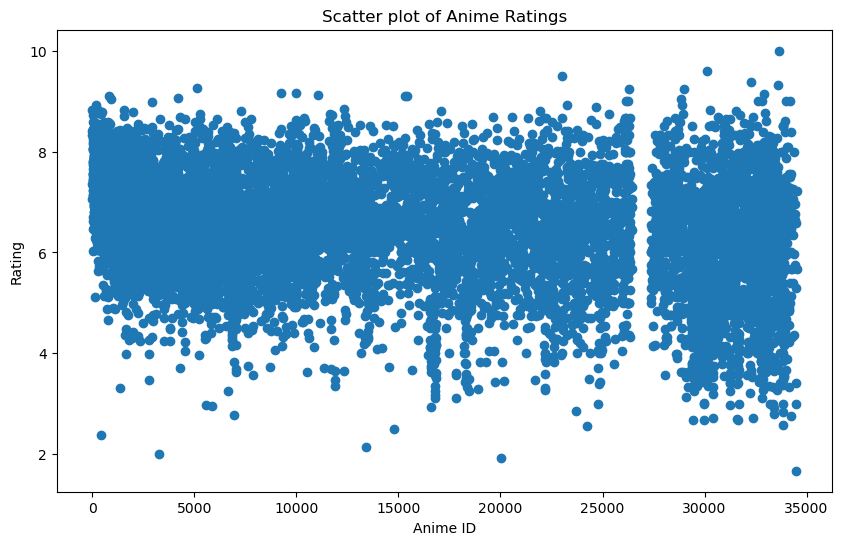

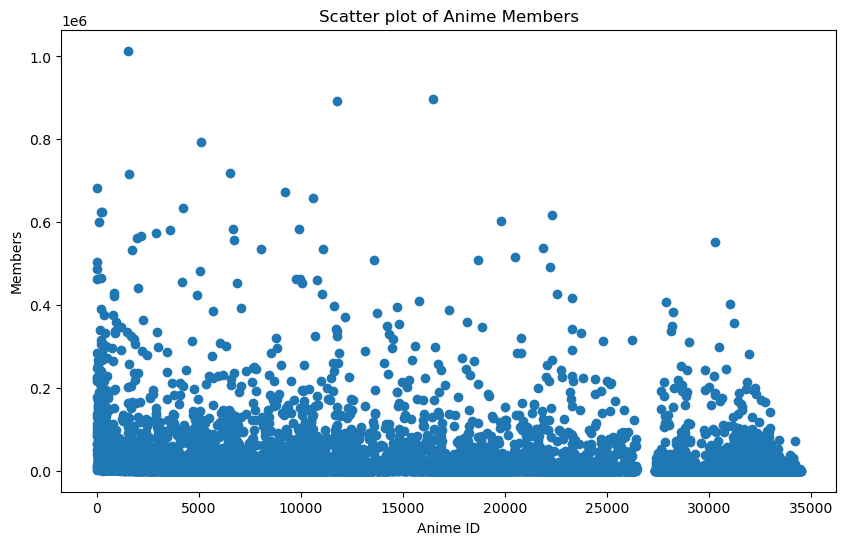

In [10]:
# Visualizing outliers for better understanding.


plt.figure(figsize=(10, 6))
plt.scatter(anime['anime_id'], anime['rating'])
plt.xlabel('Anime ID')
plt.ylabel('Rating')
plt.title('Scatter plot of Anime Ratings')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(anime['anime_id'], anime['members'])
plt.xlabel('Anime ID')
plt.ylabel('Members')
plt.title('Scatter plot of Anime Members')
plt.show()

In [11]:
# The only thing I am considering unnecessary data is episode column,
# but as of right now I think I would like to keep it since it might help me with visualization

#The inconsistency was found in the 'name' column of the anime dataset.
#Non-alphanumeric characters were replaced with spaces, extra spaces were removed, and HTML entities were decoded.

import re
import html


def clean_anime_name(name):
    # Decode HTML entities
    name = html.unescape(name)
    
    # Replace non-alphanumeric characters with spaces
    name = re.sub(r'[^a-zA-Z0-9\s]', ' ', name)
    
    # Remove extra spaces
    name = re.sub(r'\s+', ' ', name).strip()
    
    return name

anime['name'] = anime['name'].apply(clean_anime_name)

In [12]:
rating.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [13]:
# Checking for duplicate entries: 
duplicate_rows = anime[anime.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [14]:
duplicate_rows = rating[rating.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 1


In [15]:
rating = rating.drop_duplicates()

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [16]:
# Filter the 'rating' dataframe to only include the first 100 users
filtered_rating = rating[rating['user_id'].isin(range(1, 101))]

In [17]:
# Split the genre column into a list of genres
anime['genre'] = anime['genre'].apply(lambda x: x.split(", "))

In [18]:
# Explode the genre lists into separate rows
anime = anime.explode('genre')

In [19]:
def expand_genres_and_calculate_avg(df):
    return df.groupby('genre')['rating'].mean().sort_values(ascending=False)

In [20]:
# Apply the function to calculate the average ratings
average_ratings = expand_genres_and_calculate_avg(anime)

In [21]:
# Print the calculated average ratings
print(average_ratings)

genre
Josei            7.443077
Thriller         7.382326
Mystery          7.232412
Police           7.122051
Shounen          7.057553
Psychological    7.010398
Military         7.004904
Supernatural     7.000380
Romance          6.999054
Shoujo Ai        6.978148
Drama            6.977218
School           6.972049
Seinen           6.966353
Harem            6.965687
Shounen Ai       6.961613
Super Power      6.906785
Vampire          6.884600
Shoujo           6.875976
Samurai          6.853836
Martial Arts     6.819356
Magic            6.805890
Action           6.787150
Game             6.783333
Sports           6.777974
Historical       6.746216
Adventure        6.742539
Slice of Life    6.730498
Sci-Fi           6.701488
Space            6.683395
Demons           6.676307
Fantasy          6.673671
Ecchi            6.666640
Mecha            6.644790
Comedy           6.622402
Parody           6.494938
Cars             6.468611
Yaoi             6.433684
Horror           6.426851
Hentai

In [22]:
# Merge the two datasets on the 'anime_id' column
merged_df = pd.merge(filtered_rating, anime, on='anime_id', how='inner')

In [23]:
print(f"The rating DataFrame now has {filtered_rating.shape[0]} rows and {filtered_rating.shape[1]} columns.")

The rating DataFrame now has 8278 rows and 3 columns.


In [24]:
print(f"The rating DataFrame now has {rating.shape[0]} rows and {rating.shape[1]} columns.")

The rating DataFrame now has 7813736 rows and 3 columns.


In [25]:
print(merged_df)

       user_id  anime_id  rating_x                            name  \
0            1        20        -1                          Naruto   
1            1        20        -1                          Naruto   
2            1        20        -1                          Naruto   
3            1        20        -1                          Naruto   
4            1        20        -1                          Naruto   
...        ...       ...       ...                             ...   
37195       99     21845         2  Ushinawareta Mirai wo Motomete   
37196       99     32281         5                   Kimi no Na wa   
37197       99     32281         5                   Kimi no Na wa   
37198       99     32281         5                   Kimi no Na wa   
37199       99     32281         5                   Kimi no Na wa   

              genre   type episodes  rating_y  members  
0            Action     TV      220      7.81   683297  
1            Comedy     TV      220      7.81

In [26]:
# Only include rows where rating_x is not equal to -1
filtered_df = merged_df[merged_df['rating_x'] != -1]

In [27]:
# Then group by 'genre' and calculate the mean
avg_rating_per_genre = filtered_df.groupby('genre')['rating_x'].mean()

In [28]:
print(avg_rating_per_genre)

genre
Action           7.775322
Adventure        7.992260
Cars             7.600000
Comedy           7.541321
Dementia         8.489796
Demons           7.649123
Drama            8.075652
Ecchi            6.532959
Fantasy          7.806763
Game             7.891626
Harem            6.766764
Hentai           7.458333
Historical       8.228477
Horror           7.490741
Josei            8.105263
Kids             7.629371
Magic            7.765921
Martial Arts     7.344262
Mecha            7.960340
Military         8.361702
Music            7.938931
Mystery          7.964529
Parody           7.655172
Police           8.223140
Psychological    8.059642
Romance          7.502896
Samurai          8.105769
School           7.465278
Sci-Fi           7.676166
Seinen           7.562883
Shoujo           7.986523
Shoujo Ai        7.173077
Shounen          7.765041
Shounen Ai       7.256410
Slice of Life    7.878821
Space            8.106667
Sports           7.904167
Super Power      7.794165
Supern

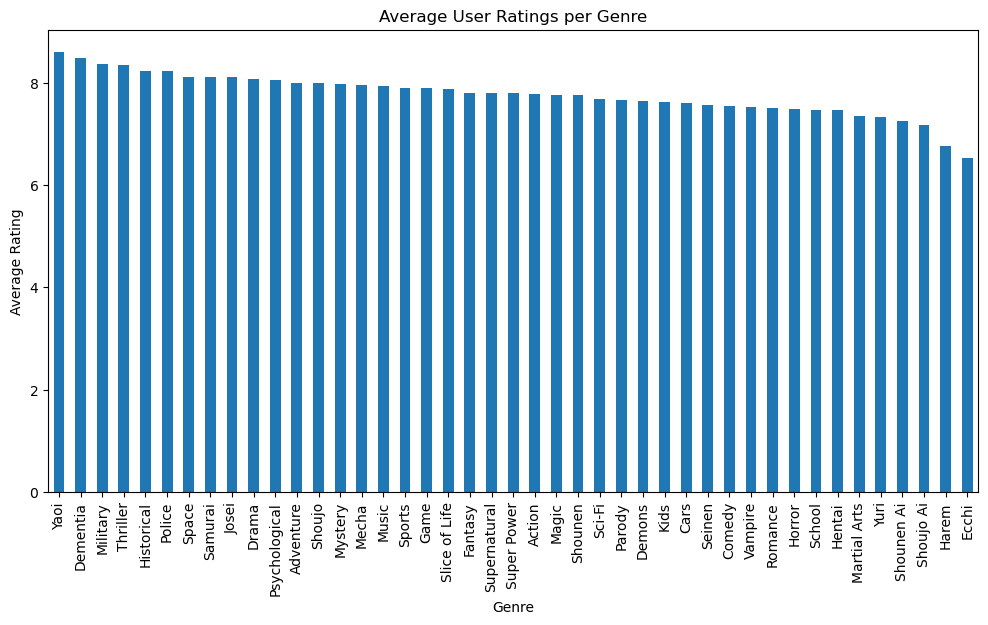

In [29]:
import matplotlib.pyplot as plt

avg_rating_per_genre.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Average User Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

In [30]:
# Let's have a look at the DataFrame now
merged_df.head(20)

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,Action,TV,220,7.81,683297
1,1,20,-1,Naruto,Comedy,TV,220,7.81,683297
2,1,20,-1,Naruto,Martial Arts,TV,220,7.81,683297
3,1,20,-1,Naruto,Shounen,TV,220,7.81,683297
4,1,20,-1,Naruto,Super Power,TV,220,7.81,683297
5,3,20,8,Naruto,Action,TV,220,7.81,683297
6,3,20,8,Naruto,Comedy,TV,220,7.81,683297
7,3,20,8,Naruto,Martial Arts,TV,220,7.81,683297
8,3,20,8,Naruto,Shounen,TV,220,7.81,683297
9,3,20,8,Naruto,Super Power,TV,220,7.81,683297


In [31]:
from sklearn.preprocessing import MultiLabelBinarizer
# Filter out rows where rating_x is -1 or NaN
merged_df = merged_df[merged_df['rating_x'] > 0]

In [32]:
#Use MultiLabelBinarizer to transform the genre column into multiple binary columns.
mlb = MultiLabelBinarizer()

# Ensure the genres are list-like so that they can be processed by MultiLabelBinarizer
merged_df['genre'] = merged_df['genre'].apply(lambda x: [x])

# Fit transform the genres
genres_encoded = mlb.fit_transform(merged_df['genre'])

# Convert the results to a DataFrame
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=merged_df.index)

# Concatenate the original DataFrame with the genres DataFrame
merged_df = pd.concat([merged_df, genres_df], axis=1)

In [33]:
# A user-item interaction matrix with users as rows, animes as columns, and user ratings as values.
user_item_matrix = merged_df.pivot_table(index='user_id', columns='name', values='rating_x')

In [34]:
import sys
print(sys.executable)

C:\Users\farkh\anaconda3\python.exe


In [35]:
from surprise import SVD
print(SVD)

<class 'surprise.prediction_algorithms.matrix_factorization.SVD'>


In [36]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Define a Reader object
# The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader()

# Create the dataset to be used for building the filter
data = Dataset.load_from_df(merged_df[['user_id', 'anime_id', 'rating_x']], reader)

# Define the algorithm object; in this case SVD
svd = SVD()

# Evaluate the performance in terms of RMSE
cross_validate(svd, data, measures=['RMSE'])

{'test_rmse': array([3.27348499, 3.25084235, 3.25153989, 3.2626562 , 3.25957889]),
 'fit_time': (1.4327902793884277,
  1.3895149230957031,
  1.3513102531433105,
  1.3925740718841553,
  1.4282684326171875),
 'test_time': (0.06439423561096191,
  0.04331707954406738,
  0.034589529037475586,
  0.03124260902404785,
  0.03223919868469238)}

In [38]:
from surprise import KNNBasic

# Define a KNN model
knn = KNNBasic()

# Retrieve the trainset.
trainset = data.build_full_trainset()

# Fit the model
knn.fit(trainset)

# Predict a certain item
userid = str(1)
itemid = str(300)
pred = knn.predict(userid, itemid, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
user: 1          item: 300        r_ui = None   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [39]:
# Create a dictionary to hold the recommendations
user_recs = {}

# We'll assume you have a list or array of unique user_ids and anime_ids
unique_user_ids = merged_df['user_id'].unique()
unique_anime_ids = merged_df['anime_id'].unique()

# Loop over all users
for user_id in unique_user_ids:
    # For each user, generate ratings for all animes they haven't rated yet
    user_ratings = []
    for anime_id in unique_anime_ids:
        # Check if this user-anime pair exists in the original DataFrame
        if not ((merged_df['user_id'] == user_id) & (merged_df['anime_id'] == anime_id)).any():
            # If the user hasn't rated this anime yet, predict the rating
            pred_rating = knn.predict(str(user_id), str(anime_id)).est
            user_ratings.append((anime_id, pred_rating))
    
    # Sort the ratings for this user and keep the top N
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n = user_ratings[:10]  # Keep top 10

    # Add the top N ratings to the dictionary
    user_recs[user_id] = top_n

In [40]:
anime.to_csv("anime.csv")
rating.to_csv("rating.csv")

In [42]:
# Save the final merged DataFrame to a new CSV file
merged_df.to_csv('merged_cleaned.csv', index=False)

# Save the user-item matrix to a new CSV file
user_item_matrix.to_csv('user_item_matrix.csv')

avg_rating_per_genre.to_csv('avg_rating_per_genre.csv')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
Missing Data: In my anime dataset, missing data was found in the 'genre', 'type', and 'rating' columns. This was handled by filling missing values in 'genre' and 'type' with 'Unknown' and removing rows with missing 'rating' data.

Outliers: Outliers were detected in the 'rating' and 'members' columns of the anime dataset using the Interquartile Range (IQR) method.

Duplicate Data: One duplicate row was found in the ratings dataset and it was removed using the drop_duplicates() function.

Inaccurate Data: Inaccurate data may exist in this dataset, but specific instances are not directly found.

Inconsistent Data: The inconsistency was found in the 'name' column of the anime dataset. Non-alphanumeric characters were replaced with spaces, extra spaces were removed, and HTML entities were decoded. These actions improved the consistency of the data.
2. Did the process of cleaning your data give you new insights into your dataset? Yes
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
for the visualization, I think it would be best to filter out my data because having too much can slow the process.